In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
# Referência: https://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html
from scipy import sparse
import time
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
%matplotlib inline
import os
from os import path
from wordcloud import WordCloud
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
nltk.download('all')

/home/emmanuel/.pyenv/versions/3.6.8/envs/cranium/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/emmanuel/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/emmanuel/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/emmanuel/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/emmanuel/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /home/emmanuel/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /home/emmanuel/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nl

[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     /home/emmanuel/nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     /home/emmanuel/nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     /home/emmanuel/nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     /home/emmanuel/nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     /home/emmanuel/nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     /home/emmanuel/nltk_data...
[nltk_data]    |   Package unicode_samples is already up

True

In [2]:
start_time = time.time()


resenhas_imdb = pd.read_csv('../../dados_imdb/imdb-reviews-pt-br.csv')

'''
# PARA MOSTRAR TODOS
#https://stackoverflow.com/questions/62207066/pandas-does-not-show-the-complete-csv-file
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(resenhas_imdb)
'''

resenhas_imdb.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
resenhas_imdb['classificacao'] = resenhas_imdb['sentiment'].replace(['neg', 'pos'], [0,1])

In [4]:
print(resenhas_imdb['sentiment'].value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [5]:
print(resenhas_imdb['classificacao'].value_counts())

0    24765
1    24694
Name: classificacao, dtype: int64


In [6]:
def treinar_classificador_sem_tratamento_stopwords():

    vetorizador = CountVectorizer(lowercase=False, max_features=400)
    bag_of_words = vetorizador.fit_transform(resenhas_imdb['text_pt'])
    
    
    '''
    matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                                                      columns=vetorizador.get_feature_names())
    '''
    
    
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              resenhas_imdb.classificacao,
                                                              random_state = 42)
    
    # https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    # https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
    regressao_logistica = LogisticRegression(solver='lbfgs', max_iter=200)
    regressao_logistica.fit(treino, classe_treino)
    acuracia = regressao_logistica.score(teste, classe_teste)

    return acuracia

In [7]:
def plotar_nuvem_palavras(sentimento=None):

    if sentimento is None:
        textos_filtrados = resenhas_imdb
    else:
        textos_filtrados = resenhas_imdb.query("sentiment == '%s'" % sentimento)

    '''
    WORDCLOUD
    https://amueller.github.io/word_cloud/auto_examples/simple.html
    '''
    # get data directory (using getcwd() is needed to support running example in generated IPython notebook)
    # d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

    # Read the whole text.
    # text = open(path.join(d, 'constitution.txt')).read()
    text = ''.join([texto for texto in textos_filtrados['text_pt']])
    # Generate a word cloud image
    wordcloud = WordCloud(  # width=400,
        # height=500,
        max_font_size=40,
        collocations=False).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    # The pil way (if you don't have matplotlib)
    # image = wordcloud.to_image()
    # image.show()

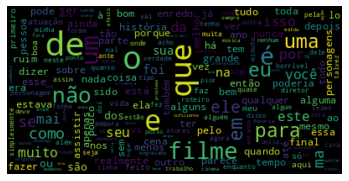

In [8]:
plotar_nuvem_palavras('neg')

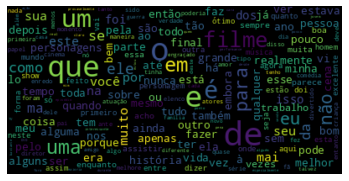

In [9]:
plotar_nuvem_palavras('pos')

In [10]:
tokenizador = tokenize.WhitespaceTokenizer()

def tokenizar_resenhas(dados, sem_stopwords=True):
    '''
    REFERÊNCIAS:

    IMPORTANTE !!!

    https://github.com/nltk/nltk/wiki
    https://realpython.com/nltk-nlp-python/#tokenizing

    '''
    
    if sem_stopwords == True:
        
        #stop_words = set(stopwords.words("portuguese"))
        stop_words = nltk.corpus.stopwords.words("portuguese")
        
    else:
        stop_words = ''

    filtered_list = ''.join([word for word in resenhas_imdb['text_pt'] if word not in stop_words])
    
    tokens = tokenizador.tokenize(filtered_list)
    
    frequencia = nltk.FreqDist(tokens)
    
    df_frequencia = pd.DataFrame({"Palavra":list(frequencia.keys()),
                                  "Frequencia":list(frequencia.values())})
    
    return df_frequencia




df_frequencia = tokenizar_resenhas(resenhas_imdb)
df_frequencia.head()

,Palavra,Frequencia
0,Mais,1469
1,uma,130883
2,"vez,",1927
3,o,244836
4,Sr.,1738


In [11]:
#tokenizar_resenhas(resenhas_imdb, sem_stopwords=True)
df_frequencia.nlargest(columns = 'Frequencia', n=50)

,Palavra,Frequencia
20,de,417383
14,que,325058
42,e,299720
3,o,244836
7,um,216380
102,a,210154
45,é,192359
199,em,132770
1,uma,130883
29,não,127894


In [12]:
def treinar_classificador_com_tratamento_stopwords():

    vetorizador = CountVectorizer(lowercase=False, max_features=400)

    tamanho_texto_integral = len(resenhas_imdb['text_pt'])

    palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

    frase_processada = list()

    for opiniao in resenhas_imdb.text_pt:
        palavras_texto = tokenizador.tokenize(opiniao)
        nova_frase = [palavra for palavra in palavras_texto if palavra not in palavras_irrelevantes]
        frase_processada.append(' '.join(nova_frase))

    resenhas_imdb["tratamento_1"] = frase_processada


    bag_of_words = vetorizador.fit_transform(resenhas_imdb["tratamento_1"])

    '''
    matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                                                      columns=vetorizador.get_feature_names())
    '''

    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                                  resenhas_imdb.classificacao,
                                                                  random_state=42)

    # https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    # https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
    regressao_logistica = LogisticRegression(solver='lbfgs', max_iter=200)
    regressao_logistica.fit(treino, classe_treino)
    acuracia = regressao_logistica.score(teste, classe_teste)

    return acuracia

In [13]:
# https://www.ic.unicamp.br/~mc102/mc102-1s2019/labs/format.html
print('Acurácia %.2f%%' % (treinar_classificador_sem_tratamento_stopwords() * 100))

Acurácia 80.84%


In [14]:
# https://www.ic.unicamp.br/~mc102/mc102-1s2019/labs/format.html
print('Acurácia %.2f%%' % (treinar_classificador_com_tratamento_stopwords() * 100))

Acurácia 80.95%


In [15]:
tempo_execucao = time.time() - start_time
print('-----Tempo de execução: %s segundos' % tempo_execucao)

-----Tempo de execução: 57.465575218200684 segundos
